# Name: Krishna Dev Adhikari Danuwar 
# Khwopa Engineeering College 
# Bhaktapur, Nepal 
gmail:74krishnadev@gmail.com

**MINI_Project: BigMart**





Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

We will handle this problem in a structured way. We will be following the table of content given below.

1).Problem Statement\
2).Hypothesis Generation\
3).Loading Packages and Data\
4).Data Structure and Content\
5).Exploratory Data Analysis\
6).Univariate Analysis\
7).Bivariate Analysis\
8).Missing Value Treatment\
9).Feature Engineering\
10).Encoding Categorical Variables\
11).Label Encoding\
12).One Hot Encoding\
13).PreProcessing Data\
14).Modeling\
15).Linear Regression\
16).Regularized Linear Regression\
17).RandomForest\
18).XGBoost\
19).Summary

**Curriculum For This Project**

The Business Problem Exploring \
The Dataset \
Exploratory Data Analysis (eda) - Outliers\
Exploratory Data Analysis (eda) - Graphs\
Converting Categorical To Numerical\
Seperating Training And Test Data\
Running The Models\
Hyper Parameter Tuning XGB And GBR\
Standard Scaling 06m Robust Scaling\
Final Predictions On The Test Dataset\
Saving The Final Model\



**Hypothesis Generation**

**Store level Hypothesis**

City type: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.\
Population Density: Stores located in densely populated areas should have higher sales because of more demand.\
Store Capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place\
Competitors: Stores having similar establishments nearby should have less sales because of more competition.\
Marketing: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.\
Location: Stores located within popular marketplaces should have higher sales because of better access to customers.\
Customer Behavior: Stores keeping the right set of products to meet the local needs of customers will have higher sales.\
Ambiance: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.

**Loading Packages and Data**

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV,LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")#allows you to handle all warnings with the standard logging infrastructure.

In [122]:
# read in csv file train
train = pd.read_csv("Train.csv")
# read in csv file test
test = pd.read_csv("Test.csv")

In [123]:
# explore the first 5 rows of train data
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
# explore the first 5 rows of test data
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [125]:
# Shape of train and test data
train.shape, test.shape

((8523, 12), (5681, 11))

train data: rows =8523 and column=12\
test data : rows=5681 and column=11 \
we can see that the test data column is missing

In [126]:
len(train['Item_Identifier'].unique())# checking the unique valeue


1559

There are altogether 1559 unique  values so accoarding to questions the "Item_Identifier" is the Products .

In [127]:
len(train.Outlet_Identifier.unique())#Number of stores or we can say outlets or Outlet_Identifier is 10.

10

In [128]:
train.info()# information of training data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [129]:
test.info()# information of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [130]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [131]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


**There are missing values in the columns 'Item_Weight', 'Outlet_Size'.**

Because of : The product not weighted.\
             The outlet size was not entered.

**Missing values **

In [132]:
train['Item_Weight'].dtype, train['Outlet_Size'].dtype

(dtype('float64'), dtype('O'))

In [133]:
test['Item_Weight'].dtype, test['Outlet_Size'].dtype

(dtype('float64'), dtype('O'))

In [134]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [135]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [136]:
print(f"There are {train['Item_Weight'].isnull().sum()} missing in train and {test['Item_Weight'].isnull().sum()} in test")

print(f"There are {train['Outlet_Size'].isnull().sum()} missing in train and {test['Outlet_Size'].isnull().sum()} in test")


There are 1463 missing in train and 976 in test
There are 2410 missing in train and 1606 in test


In [137]:
print(train.isnull().sum()/train.shape[0] *100,"/n/t")
print(test.isnull().sum()/test.shape[0] *100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 /n/t
Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


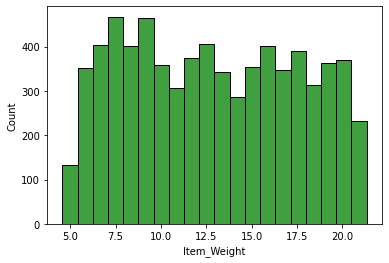

In [138]:
sns.histplot(train['Item_Weight'],color="green")

**we can impute Item_Weight missing values by looking at the data that which item has what weight in the data.**

In [139]:
def miss_item_weight(df):
    item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
    miss_bool = df['Item_Weight'].isnull() 
    df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])    

In [140]:
miss_item_weight(train)
miss_item_weight(test)

In [141]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [142]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                    20
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**We can drop rest null values of item_weight cause they are unique**

In [143]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [144]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [145]:
test.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [146]:
train.nunique()

Item_Identifier              1551
Item_Weight                   445
Item_Fat_Content                5
Item_Visibility              5637
Item_Type                      16
Item_MRP                     4691
Outlet_Identifier               7
Outlet_Establishment_Year       6
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3056
dtype: int64

In [147]:
test.nunique()

Item_Identifier              1486
Item_Weight                   431
Item_Fat_Content                5
Item_Visibility              3752
Item_Type                      16
Item_MRP                     3388
Outlet_Identifier               7
Outlet_Establishment_Year       6
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

**univariate analysis**

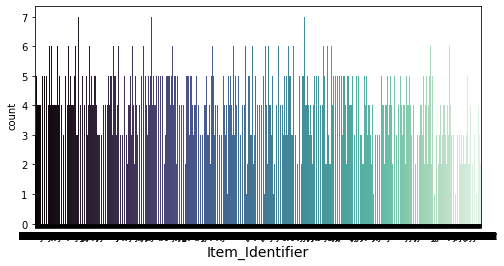

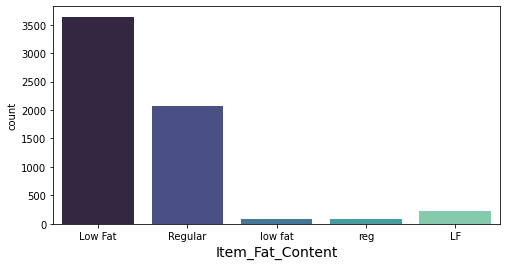

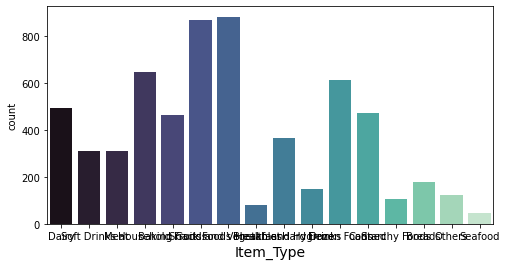

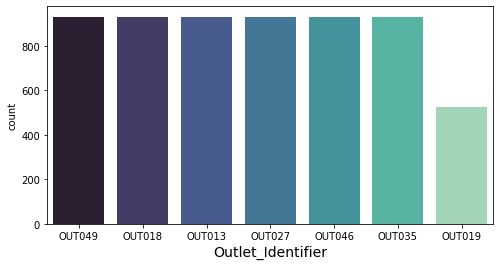

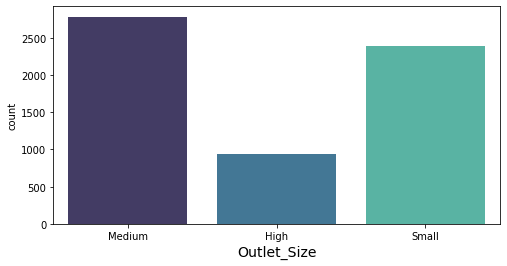

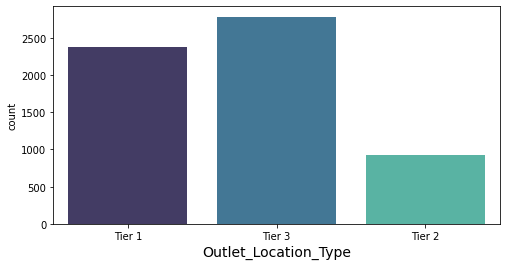

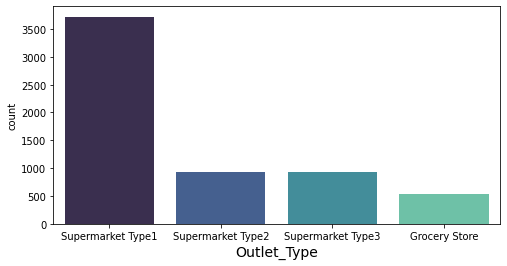

In [148]:
#categorical variables
x = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
for i in x: 
    plt.figure(figsize=(8,4))
    sns.countplot(x = i , data=train , palette='mako')
    plt.xlabel(i, fontsize=14)
    plt.show()

In [149]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [150]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


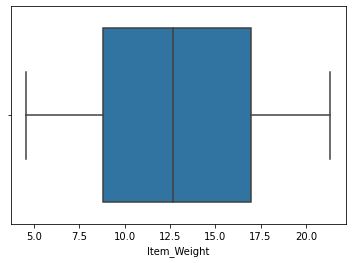

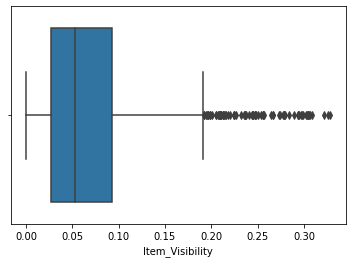

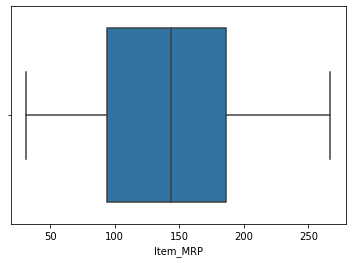

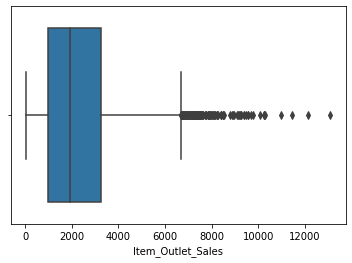

In [151]:
x= ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales' ]
for i in x:
    sns.boxplot(x=i, data=train, orient='h')
    plt.show()

**Bivariate analysis**

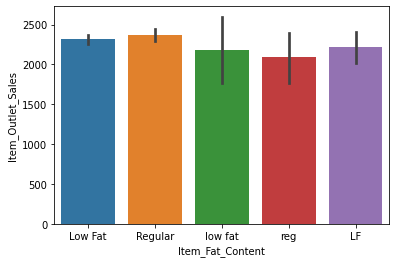

In [152]:
sns.barplot(x = train['Item_Fat_Content'],y = train['Item_Outlet_Sales'])

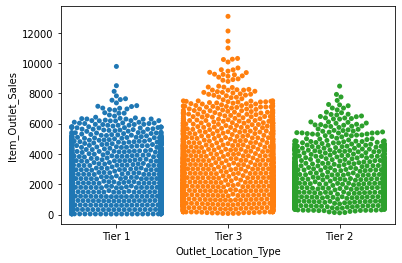

In [153]:
sns.swarmplot(x = train['Outlet_Location_Type'],y = train['Item_Outlet_Sales'])

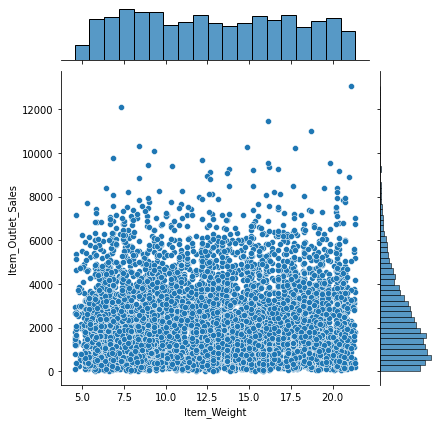

In [154]:
sns.jointplot(x = train['Item_Weight'],y = train['Item_Outlet_Sales'])

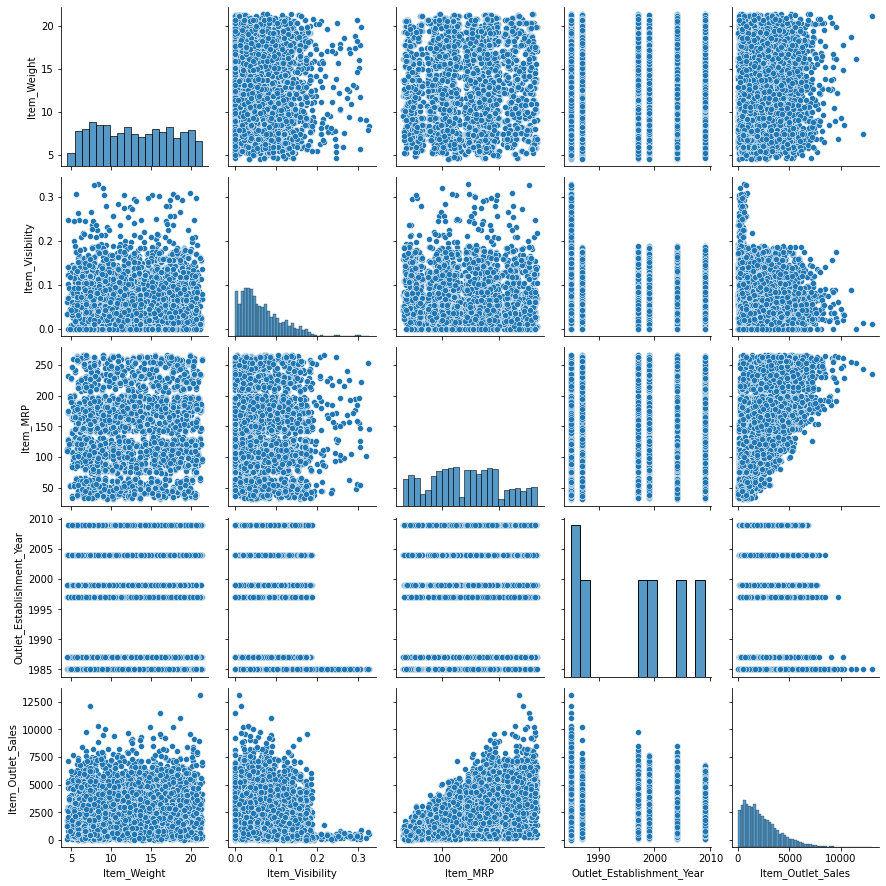

In [155]:
sns.pairplot(data = train)

**Multivariate analysis**

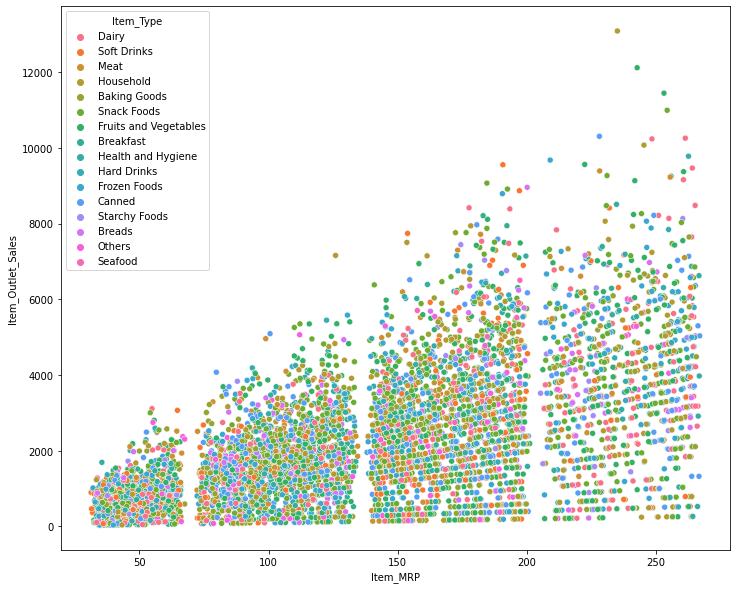

In [156]:
plt.figure(figsize=[12,10])
sns.scatterplot(x = train['Item_MRP'], y = train['Item_Outlet_Sales'], hue=train['Item_Type'])

**So much change in sales and MRP in same item may be because of outlet Region wise Price.**

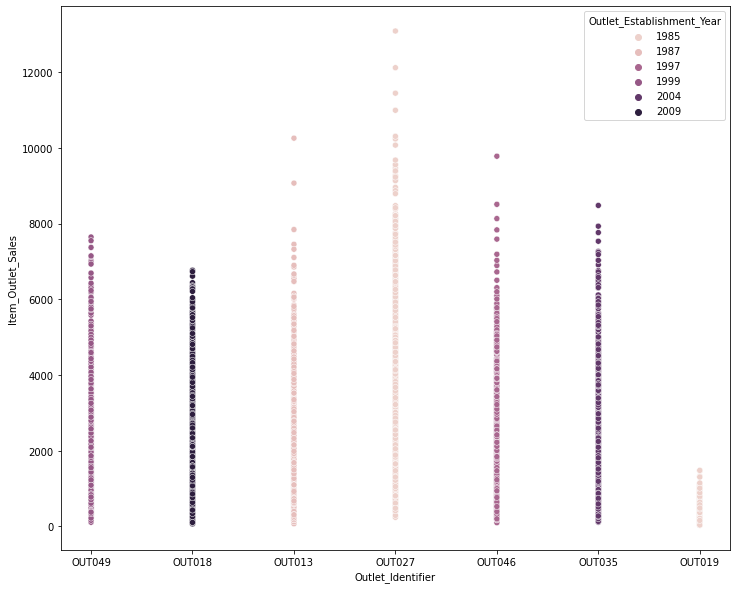

In [157]:
plt.figure(figsize=[12,10])

sns.scatterplot(x = train['Outlet_Identifier'], y = train['Item_Outlet_Sales'], hue=train['Outlet_Establishment_Year'])

**This shows the store before establishment year 1995 has highest sales except OUT019 It has least sales**

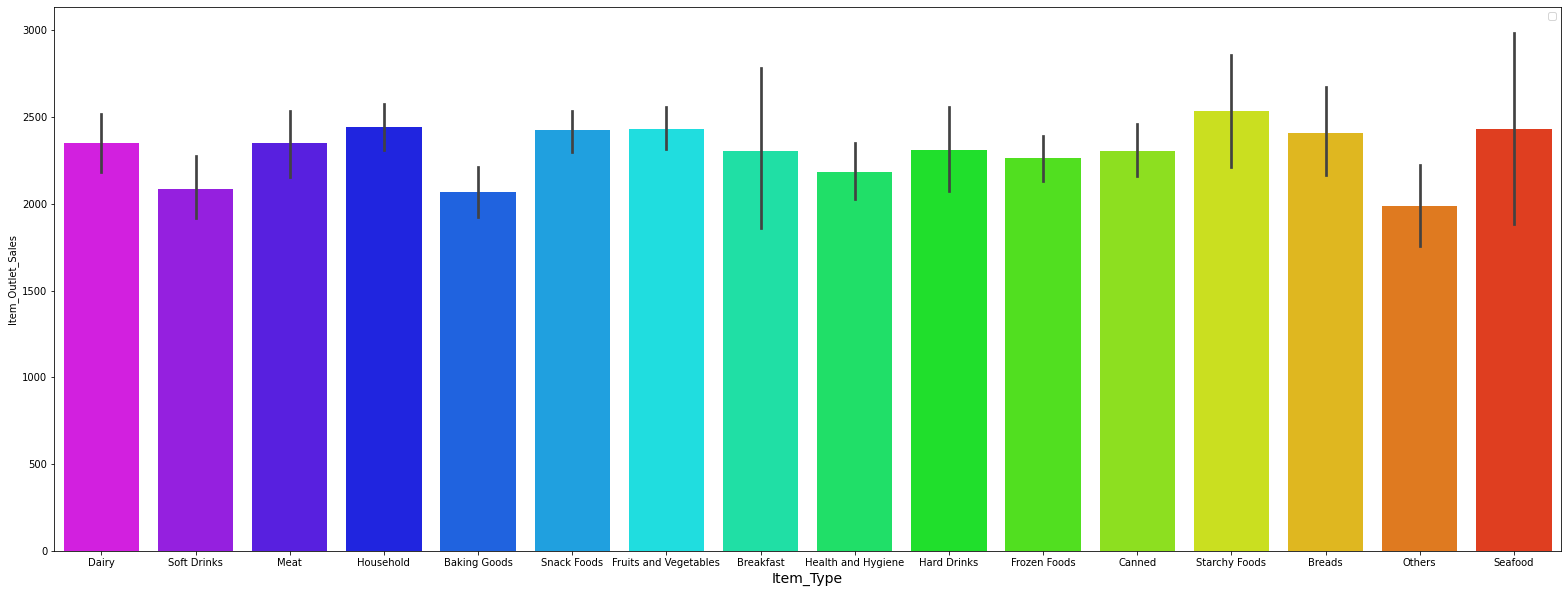

In [158]:
# Sales wrt item types
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

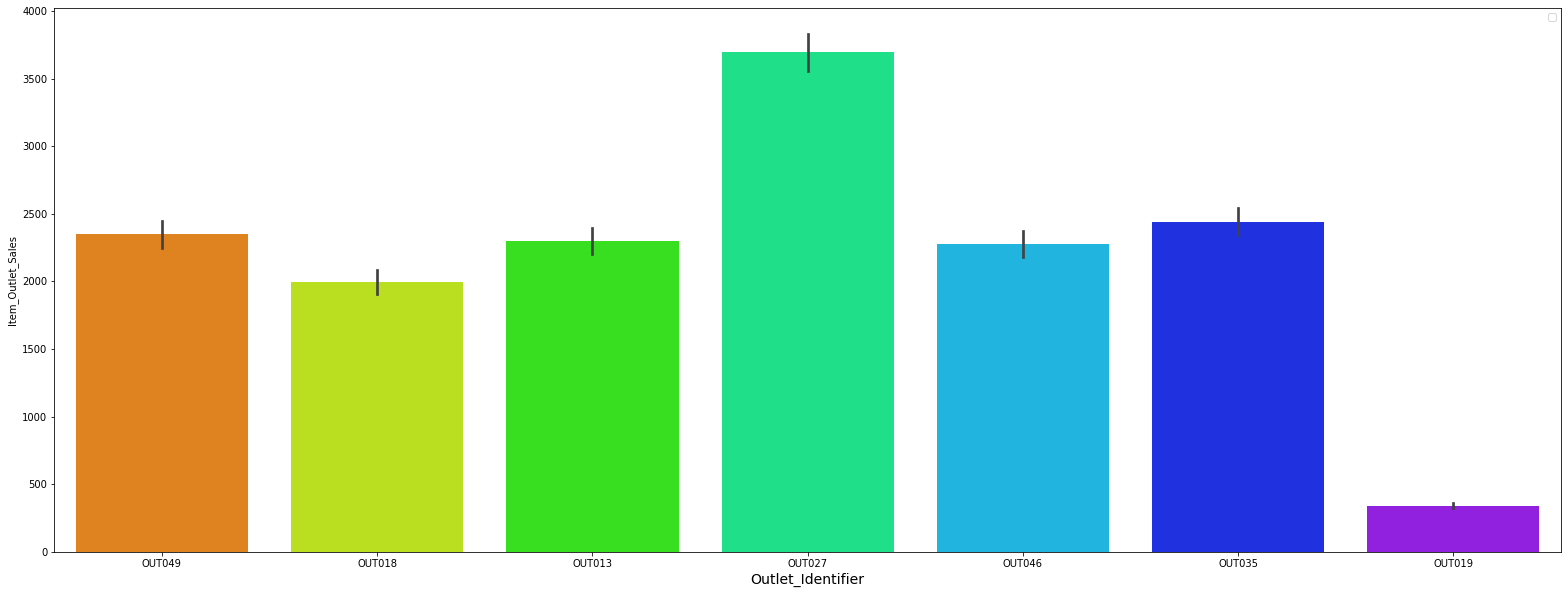

In [159]:
# sales wrt outlet stores

plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

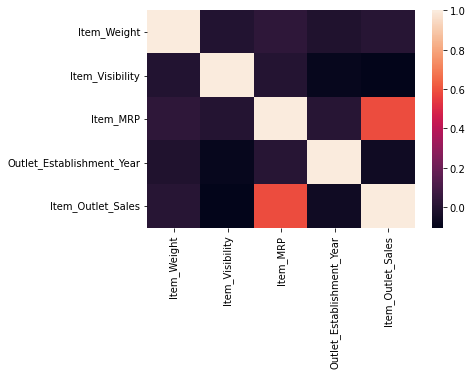

In [160]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

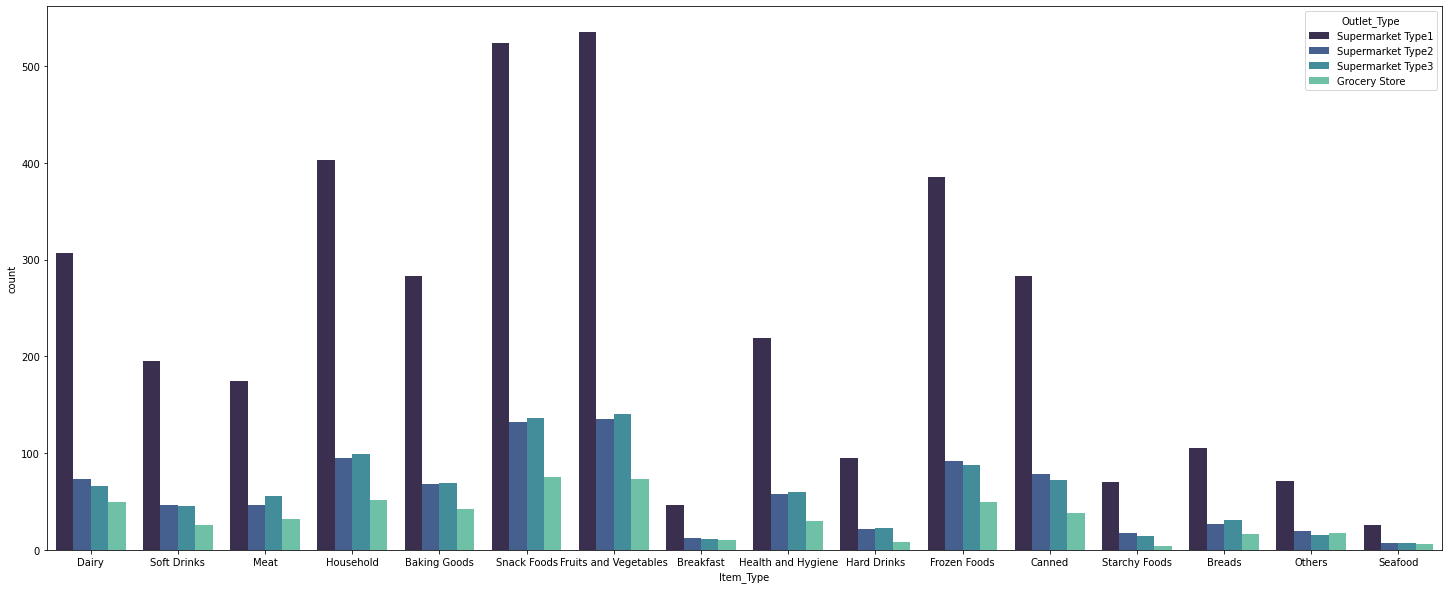

In [161]:
plt.figure(figsize=[25,10])
sns.countplot(x = "Item_Type", data=train, palette='mako', hue='Outlet_Type', orient='v')

**Feature Engineering**

In [162]:
def cal_outlet_year(df):
    #Years:
    df['Outlet_Years'] = 2022 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())

In [163]:
cal_outlet_year(train)
cal_outlet_year(test)

count    6109.000000
mean       26.198560
std         8.841193
min        13.000000
25%        18.000000
50%        25.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64
count    4055.000000
mean       26.155610
std         8.831605
min        13.000000
25%        18.000000
50%        25.000000
75%        35.000000
max        37.000000
Name: Outlet_Years, dtype: float64


In [164]:
train.drop(columns="Outlet_Establishment_Year", inplace=True)
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,13
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,Small,Tier 1,Supermarket Type1,3608.6360,25
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834,35
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976,13


In [165]:
test.drop(columns="Outlet_Establishment_Year", inplace=True)
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,Small,Tier 1,Supermarket Type1,25
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,Medium,Tier 3,Supermarket Type2,13
7,FDC48,9.195,Low Fat,0.015782,Baking Goods,81.0592,OUT027,Medium,Tier 3,Supermarket Type3,37
...,...,...,...,...,...,...,...,...,...,...,...
5673,FDF46,7.070,Low Fat,0.094053,Snack Foods,116.0834,OUT018,Medium,Tier 3,Supermarket Type2,13
5674,DRL35,15.700,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,Small,Tier 1,Supermarket Type1,25
5675,FDW46,13.000,Regular,0.070411,Snack Foods,63.4484,OUT049,Medium,Tier 1,Supermarket Type1,23
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1,25


In [166]:
new = train.groupby(["Item_Identifier","Item_Type"]).size()
new


Item_Identifier  Item_Type         
DRA12            Soft Drinks           3
DRA24            Soft Drinks           5
DRA59            Soft Drinks           6
DRB01            Soft Drinks           3
DRB13            Soft Drinks           3
                                      ..
NCZ30            Household             4
NCZ41            Health and Hygiene    3
NCZ42            Household             3
NCZ53            Health and Hygiene    4
NCZ54            Household             5
Length: 1551, dtype: int64

As we can see in Item_Identifier the first two letters show the item type description.

DR == Drinks

FD. == Food items

NC. == Non Consumables such as household items

In [167]:
new.dtype

dtype('int64')

In [168]:
train.Item_Fat_Content

0       Low Fat
1       Regular
2       Low Fat
4       Low Fat
5       Regular
         ...   
8517        reg
8518    Low Fat
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 6109, dtype: object

In [169]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2]) #Taking first two initials
train['Item_Type_Combined']

0       FD
1       DR
2       FD
4       NC
5       FD
        ..
8517    FD
8518    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_Combined, Length: 6109, dtype: object

In [170]:
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(train['Item_Type_Combined'].value_counts())

Food              4407
Non-Consumable    1139
Drinks             563
Name: Item_Type_Combined, dtype: int64


In [171]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined']

0       FD
4       FD
5       FD
6       FD
7       FD
        ..
5673    FD
5674    DR
5675    FD
5676    FD
5677    FD
Name: Item_Type_Combined, Length: 4055, dtype: object

In [172]:
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
print(test['Item_Type_Combined'].value_counts())

Food              2894
Non-Consumable     784
Drinks             377
Name: Item_Type_Combined, dtype: int64


In [173]:
train.loc[train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(train['Item_Fat_Content'].value_counts())

Low Fat       2586
Regular       2073
Non-Edible    1139
LF             170
reg             82
low fat         59
Name: Item_Fat_Content, dtype: int64


In [174]:
test.loc[test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
print(test['Item_Fat_Content'].value_counts())

Low Fat       1698
Regular       1375
Non-Edible     784
LF             103
reg             59
low fat         36
Name: Item_Fat_Content, dtype: int64


In [175]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23,Food
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13,Drinks
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23,Food
4,NCD19,8.930,Non-Edible,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35,Non-Consumable
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,Medium,Tier 3,Supermarket Type2,556.6088,13,Food


In [176]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,23,Food
4,FDY38,13.600,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,37,Food
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,Small,Tier 1,Supermarket Type1,25,Food
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,Medium,Tier 3,Supermarket Type2,13,Food
7,FDC48,9.195,Low Fat,0.015782,Baking Goods,81.0592,OUT027,Medium,Tier 3,Supermarket Type3,37,Food


**Saving the first cleaned csv file**

In [177]:
train.to_csv("cleaned_train.csv",index=False)
test.to_csv("cleaned_test.csv", index=False)

**Label Encoding and One-hot Encoding**

In [178]:
# read in csv file train
train1 = pd.read_csv("cleaned_train.csv")
# read in csv file test
test1 = pd.read_csv("cleaned_test.csv")

In [179]:
le = LabelEncoder()
Labels = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Labels:
    train1[i] = le.fit_transform(train1[i])
    test1[i] = le.fit_transform(test1[i])

In [180]:
train1['Outlet'] = le.fit_transform(train1['Outlet_Identifier'])
test1['Outlet'] = le.fit_transform(test1['Outlet_Identifier'])

train1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,Item_Type_Combined,Outlet
0,FDA15,9.300,1,0.016047,Dairy,249.8092,OUT049,1,0,Supermarket Type1,3735.1380,23,Food,6
1,DRC01,5.920,3,0.019278,Soft Drinks,48.2692,OUT018,1,2,Supermarket Type2,443.4228,13,Drinks,1
2,FDN15,17.500,1,0.016760,Meat,141.6180,OUT049,1,0,Supermarket Type1,2097.2700,23,Food,6
3,NCD19,8.930,2,0.000000,Household,53.8614,OUT013,0,2,Supermarket Type1,994.7052,35,Non-Consumable,0
4,FDP36,10.395,3,0.000000,Baking Goods,51.4008,OUT018,1,2,Supermarket Type2,556.6088,13,Food,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,FDF53,20.750,5,0.083607,Frozen Foods,178.8318,OUT046,2,0,Supermarket Type1,3608.6360,25,Food,5
6105,FDF22,6.865,1,0.056783,Snack Foods,214.5218,OUT013,0,2,Supermarket Type1,2778.3834,35,Food,0
6106,NCJ29,10.600,2,0.035186,Health and Hygiene,85.1224,OUT035,2,1,Supermarket Type1,1193.1136,18,Non-Consumable,4
6107,FDN46,7.210,3,0.145221,Snack Foods,103.1332,OUT018,1,2,Supermarket Type2,1845.5976,13,Food,1


In [181]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years,Item_Type_Combined,Outlet
0,FDW58,20.750,1,0.007565,Snack Foods,107.8622,OUT049,1,0,Supermarket Type1,23,Food,6
1,FDY38,13.600,3,0.118599,Dairy,234.2300,OUT027,1,2,Supermarket Type3,37,Food,3
2,FDH56,9.800,3,0.063817,Fruits and Vegetables,117.1492,OUT046,2,0,Supermarket Type1,25,Food,5
3,FDL48,19.350,3,0.082602,Baking Goods,50.1034,OUT018,1,2,Supermarket Type2,13,Food,1
4,FDC48,9.195,1,0.015782,Baking Goods,81.0592,OUT027,1,2,Supermarket Type3,37,Food,3


In [182]:
train1 = pd.get_dummies(train1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)
test1 = pd.get_dummies(test1, columns=['Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'], drop_first = True)

In [183]:
train1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)
test1.drop(columns=["Item_Identifier",'Outlet_Identifier','Item_Type'], inplace=True)

In [184]:
test1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
0,20.750,1,0.007565,107.8622,23,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1,13.600,3,0.118599,234.2300,37,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
2,9.800,3,0.063817,117.1492,25,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
3,19.350,3,0.082602,50.1034,13,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0
4,9.195,1,0.015782,81.0592,37,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4050,7.070,1,0.094053,116.0834,13,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0
4051,15.700,1,0.030704,43.2770,25,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
4052,13.000,3,0.070411,63.4484,23,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
4053,10.500,3,0.013496,141.3154,25,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0


**Taking all the features from outlet cause the outlet is giving variation in the prices**

***Saving the cleaned data ready for model preparation***

In [185]:
train1.to_csv("Train_model_data.csv", index=False)
test1.to_csv("Test_model_data.csv", index=False)

**PreProcessing for model preparation**

In [186]:
train2 = pd.read_csv("Train_model_data.csv")
# test2 = pd.read_csv("Test_model_data.csv")

In [187]:
train2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
0,9.300,1,0.016047,249.8092,3735.1380,23,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,5.920,3,0.019278,48.2692,443.4228,13,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
2,17.500,1,0.016760,141.6180,2097.2700,23,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,8.930,2,0.000000,53.8614,994.7052,35,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10.395,3,0.000000,51.4008,556.6088,13,0,1,1,0,...,1,0,1,0,1,0,0,0,0,0


In [188]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6109 entries, 0 to 6108
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        6109 non-null   float64
 1   Item_Fat_Content                   6109 non-null   int64  
 2   Item_Visibility                    6109 non-null   float64
 3   Item_MRP                           6109 non-null   float64
 4   Item_Outlet_Sales                  6109 non-null   float64
 5   Outlet_Years                       6109 non-null   int64  
 6   Outlet_Location_Type_1             6109 non-null   int64  
 7   Outlet_Location_Type_2             6109 non-null   int64  
 8   Outlet_Size_1                      6109 non-null   int64  
 9   Outlet_Size_2                      6109 non-null   int64  
 10  Outlet_Type_Supermarket Type1      6109 non-null   int64  
 11  Outlet_Type_Supermarket Type2      6109 non-null   int64

In [189]:
train2.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
count,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,...,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000,6109.000000
mean,12.913663,1.919954,0.064477,141.281070,2322.641393,26.198560,0.152234,0.457031,0.456703,0.390735,...,0.151907,0.152562,0.721395,0.186446,0.151907,0.086266,0.152562,0.152234,0.152234,0.152234
std,4.667931,1.013486,0.050073,62.241468,1741.638109,8.841193,0.359277,0.498191,0.498163,0.487955,...,0.358960,0.359594,0.448350,0.389498,0.358960,0.280780,0.359594,0.359277,0.359277,0.359277
min,4.555000,0.000000,0.000000,31.290000,33.955800,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,1.000000,0.026676,94.046200,974.731200,18.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.650000,2.000000,0.052800,143.215400,1928.156800,25.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,3.000000,0.092811,185.955600,3266.414800,35.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,5.000000,0.328391,266.888400,13086.964800,37.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
train2.shape

(6109, 21)

**Assigning Independent and Target variables to X and Y Respectively**

In [191]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales

**Performing Train_Test_Split for validation of performance of model**

In [192]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.15)

In [193]:
X_train.shape, X_test.shape

((5192, 20), (917, 20))

In [194]:
scaled = StandardScaler()
X_train[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X_train[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])

In [195]:
X_train[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
4086,-1.135503,1,-0.183845,0.906325,-0.928952,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
5784,0.420619,3,-0.585281,0.314827,-0.137016,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0
3010,0.827030,3,-1.117775,-1.095929,-0.928952,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
1090,-1.711964,3,-1.288641,-1.417545,-0.928952,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0
3018,1.575680,2,1.667148,1.460425,-0.363283,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1


In [196]:
X_test[0:5]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
1129,6.550,3,0.034658,155.8288,23,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
2515,18.350,3,0.092150,184.8266,35,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4713,8.575,1,0.023866,107.1280,35,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1580,7.350,3,0.014353,242.6512,35,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
2846,8.185,1,0.046673,48.4692,13,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0


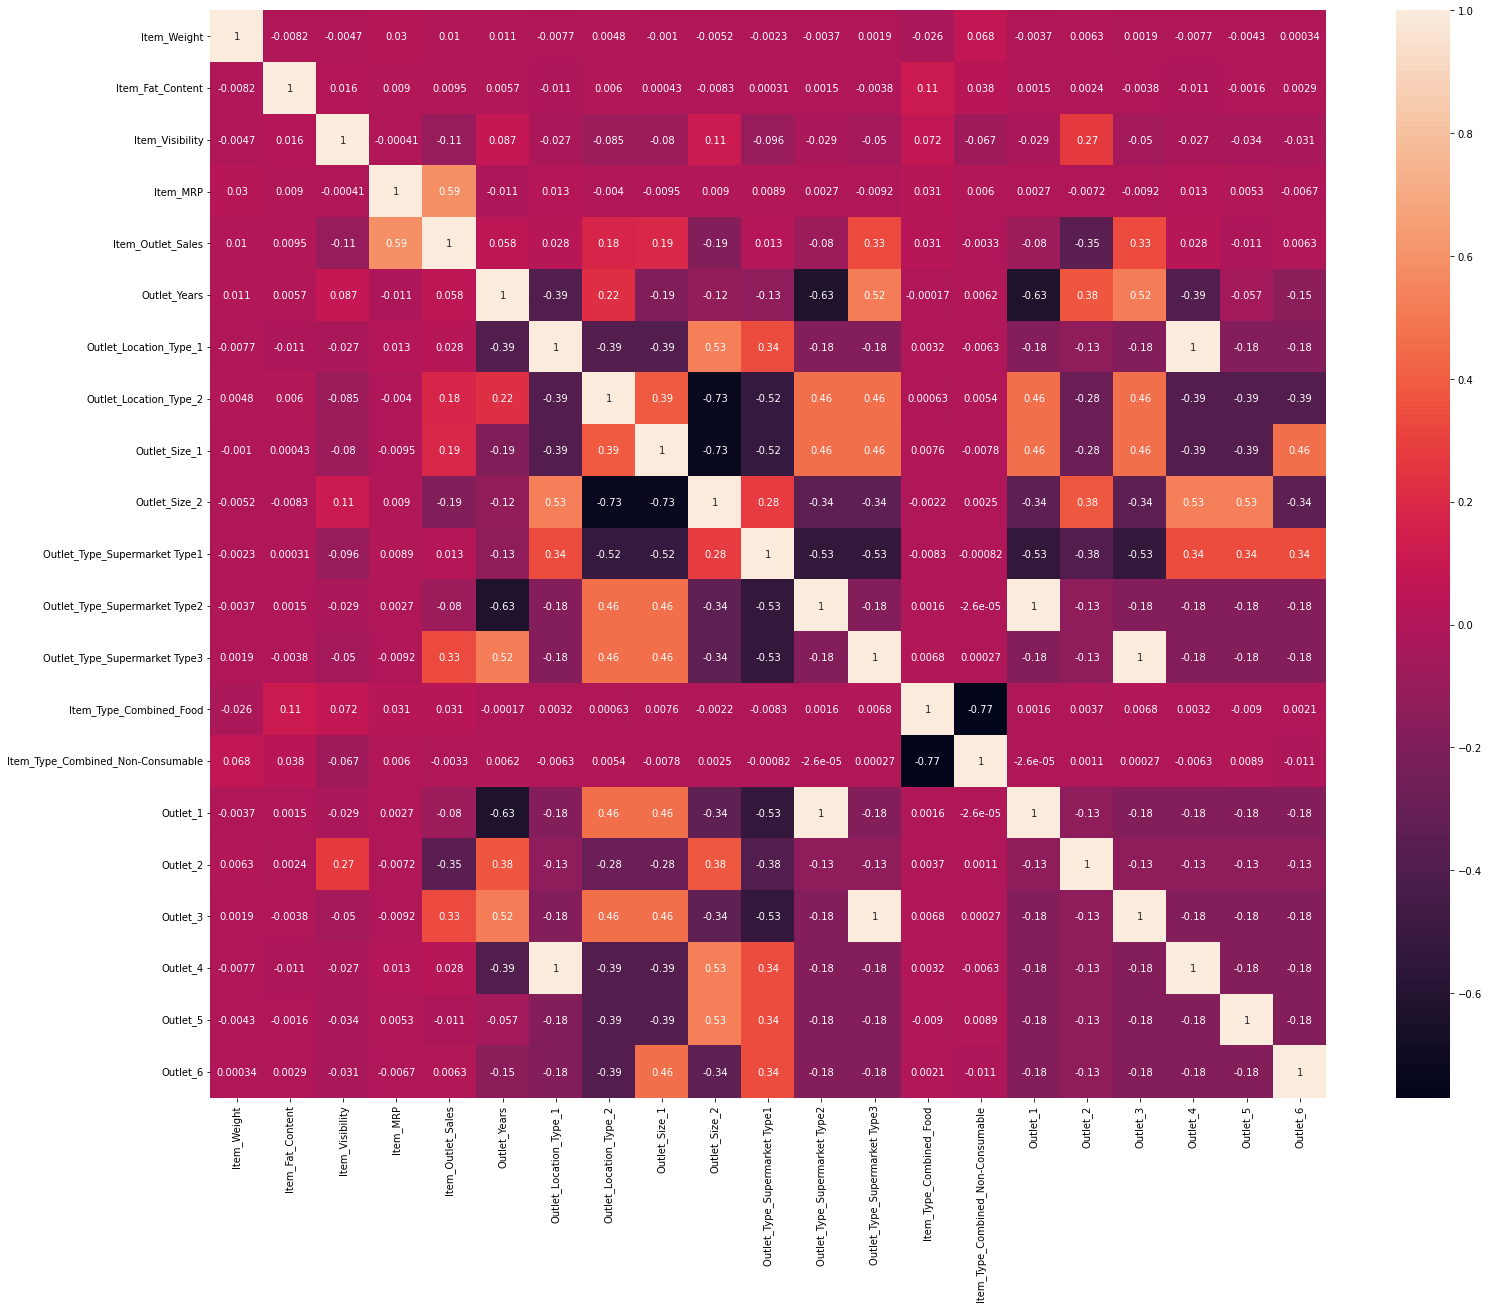

In [197]:
plt.figure(figsize = (25,20))
sns.heatmap(train2.corr(),annot = True)

**Linear Regression**

In [198]:
model_linear = LinearRegression()
model_linear.fit(X_train,Y_train)

LinearRegression()

**Note**\
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [199]:
def all_scores(model):
    print("Training score", model.score(X_train,Y_train))
    print("Test score", model.score(X_test, Y_test))
    preds = model.predict(X_test)
    print("linear_predicted values: ", preds)
    print("MAE : %.4g" % np.sqrt(mean_absolute_error(Y_test,preds)))
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(Y_test,preds)))

def cross_validate(model,X,Y, cv):
    cv_score = cross_val_score(model,X=X, y=Y, cv=cv)
    print("cv_scores", cv_score)
    print('cv_score.mean', cv_score.mean())

In [200]:
all_scores(model_linear)

Training score 0.5648200472721845
Test score -8269.28573353571
linear_predicted values:  [160771.29312914 189398.28306375 109166.58422547 249244.73958605
  50388.33726511 272277.6902628  184034.72037978 159103.11041589
  50116.29006328 170097.52723758 154095.05834506 151671.74815364
  37823.92907093 232138.42282564  40933.75563954 124602.33262597
 162827.64685706 182496.63324688 164821.91524919 116530.79916149
 181387.11689538 218446.70154217 268123.99618805 161160.43336406
 121518.81550611 232278.21361208 195636.19712351 166549.72933963
 119857.26944593 188723.09731345 177559.62571926 161511.71217352
  90919.88699033  86750.46440966  93770.98873032 129811.00995581
 249397.81291706 221515.89396287  49663.88351485 202166.83789682
 185630.30944379 260969.05745345  45050.81166687 203040.59889792
 165016.30660616  89123.14251759 162913.57886628 266122.81303394
 173383.22273046 235796.39580852 264267.9912073   79568.0083657
 109932.44275014  41589.72765042 158200.90134092 130770.54662671
 1

**Cross_validation of model and mean accuracy**

In [201]:
X = train2.drop(columns="Item_Outlet_Sales")
Y = train2.Item_Outlet_Sales

In [202]:
scaled = StandardScaler()
X[['Item_Weight','Item_Visibility','Item_MRP',
         'Outlet_Years']] = scaled.fit_transform(X[['Item_Weight',
                                                          'Item_Visibility','Item_MRP','Outlet_Years']])

In [203]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Years,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6
0,-0.774210,1,-0.967258,1.743805,-0.361809,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
1,-1.498359,3,-0.902729,-1.494494,-1.492970,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0.982601,1,-0.953022,0.005414,-0.361809,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1
3,-0.853481,2,-1.287765,-1.404640,0.995585,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
4,-0.539612,3,-1.287765,-1.444176,-1.492970,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0


In [204]:
cross_validate(model_linear,X, Y,5)

cv_scores [0.57126223 0.53973924 0.55175312 0.56216925 0.56194629]
cv_score.mean 0.557374026258071


**Regularized Linear Regression**

**Lasso Regression**

In [205]:
lassocv= LassoCV(alphas=None, cv=10, max_iter=1000, normalize=True, random_state=42)
lassocv.fit(X_train,Y_train)

LassoCV(cv=10, normalize=True, random_state=42)

In [206]:
lasso_reg = Lasso(alpha=lassocv.alpha_)
lasso_reg.fit(X_train,Y_train)

Lasso(alpha=0.08186774038407439)

In [207]:
all_scores(lasso_reg)

Training score 0.5648199370566799
Test score -8551.801281727818
linear_predicted values:  [163328.7113913  193124.40145302 112898.74115045 252965.33901563
  51979.88163868 274338.37042194 187760.68482827 161172.48500974
  52683.37688463 172654.66819284 158018.91913712 153255.00339152
  40585.55097092 234690.14141318  44866.75151476 128528.4224039
 164410.6076428  184564.08329814 166891.10517707 119286.7079776
 185114.09430361 222366.54562459 272038.25991902 164888.59255479
 124274.57267599 235025.01683183 197703.07439206 169107.79212055
 123588.82293528 190790.52546451 181480.92480088 165240.041352
  93483.15788333  89508.43250686  97699.18978595 131882.90338282
 251460.44915324 224263.3222067   52425.61924957 205891.62664268
 187211.31315819 263519.2508155   46643.54792278 206960.03902447
 168743.87655911  90712.11713162 165472.20462126 267697.28693633
 174965.95276541 237373.00102532 268183.53047336  82326.96237577
 113860.10064283  43181.92453222 161929.66640193 134501.66020415
 146

**XGBoost Regression**

In [208]:
model_XGB = XGBRegressor()

**Using RandomizedSearchCV for Hyper-Parameter Tuning**

In [209]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "learning_rate": [.03, 0.05, .07]   
}

In [210]:
random_search = RandomizedSearchCV(model_XGB, param_distributions=params,
                                   n_iter=5,n_jobs=-1,cv=5,verbose=3)

In [211]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[14:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.03, 0.05, 0.07],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=3)

**Best Parameters **

In [212]:
random_search.best_score_

0.5551417730611024

In [213]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.03,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

**Fitting a the model with best params**

In [214]:
model_XGB =  XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)

In [215]:
model_XGB.fit(X_train, Y_train)

[14:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.1, learning_rate=0.03, max_depth=5,
             min_child_weight=3)

In [216]:
all_scores(model_XGB)

Training score 0.6066286585343408
Test score -0.2330274533428054
linear_predicted values:  [3451.7817  3625.9785  3572.4185  3620.7393  3431.4526  3051.9148
 3631.7178  3162.6687  3451.7817  3451.7817  4938.011   3418.7375
 3191.4563  3451.7817  4874.713   4540.761   3431.4526  3095.709
 3156.1406  3100.228   3552.162    584.29974 4768.1367  3615.4104
 3117.0369  3191.4563  3090.38    3452.2742  3626.4785  3167.9976
 4797.03    3546.8333  3446.4526  3187.2063  4887.8516  3095.709
 3161.4695  3191.4563  3139.7295  3625.9785  3418.7375  3409.7466
 3431.4526  4874.713   3625.9785  3418.7375  3431.5857  3418.7375
 3387.451   3418.7375  4677.85    3187.2063  4903.606   3431.4526
 3631.7178  3631.7178  3491.4822   599.177   3167.9976  3631.7178
 3284.5872  3626.4785  4729.8403  3631.7178  3167.9976  3167.9976
 3381.2722  3161.4695  4874.713   3431.4526  3452.2742   583.8346
 3387.451   3187.2063  3117.0369  4637.624   3105.2444   584.29974
 3167.9976  4768.1367  3451.7817  4938.011   3446.45

**Cross_validation of model and mean accuracy**

In [217]:
cross_validate(model_XGB, X_train, Y_train, 10)

[14:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**Fitting in full training data**

In [218]:
model_XGB2 = XGBRegressor(min_child_weight=3, max_depth=5, learning_rate=0.03, gamma=0.1, colsample_bytree=0.5)
model_XGB2.fit(X, Y)

[14:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.5, gamma=0.1, learning_rate=0.03, max_depth=5,
             min_child_weight=3)

In [219]:
model_XGB2.score(X,Y)

0.5985768935639237

In [220]:
cross_validate(model_XGB2, X, Y, 10)

[14:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

**Gradient Boosting Regression**

In [221]:
model_GBR = GradientBoostingRegressor()

param_distributions = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [.03, 0.05, .07,0.5,1],
}

**Using RandomizedSearchCV for Hyper-Parameter Tuning**

In [222]:
search_cv = RandomizedSearchCV(model_GBR, param_distributions=param_distributions,
    scoring="neg_mean_absolute_error", n_iter=20, random_state=0, n_jobs=2)

In [223]:
search_cv.fit(X_train, Y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(), n_iter=20, n_jobs=2,
                   param_distributions={'learning_rate': [0.03, 0.05, 0.07, 0.5,
                                                          1],
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]},
                   random_state=0, scoring='neg_mean_absolute_error')

**Best parameters**

In [224]:
search_cv.best_params_

{'n_estimators': 200, 'max_leaf_nodes': 5, 'learning_rate': 0.07}

**Fitting a the model with best params**

In [225]:
model_GBR = GradientBoostingRegressor(n_estimators=200,max_leaf_nodes=5,learning_rate=0.07)
model_GBR.fit(X_train,Y_train)


GradientBoostingRegressor(learning_rate=0.07, max_leaf_nodes=5,
                          n_estimators=200)

In [226]:
all_scores(model_GBR)

Training score 0.6353975407559729
Test score -0.7960112613687695
linear_predicted values:  [3851.8533906  4305.72151794 4257.01539332 4260.60868993 3629.32637267
 4464.91112684 4279.07989098 4460.33399756 3896.9662186  3851.8533906
 4822.4223395  3655.96799962 4296.39560675 3851.8533906  4822.4223395
 3435.46891062 3674.43920067 4438.26949989 4441.86279651 4181.97133534
 4185.4810068   684.55297132 4803.95113845 4260.60868993 4180.84362618
 4341.50843475 4438.26949989 3915.43741965 4279.07989098 4460.33399756
 4849.06396645 4185.4810068  3851.8533906  4314.86680779 4867.5351675
 4438.26949989 4441.86279651 4341.50843475 4292.80231013 4260.60868993
 3610.85517162 3893.37292198 3629.32637267 4822.4223395  4305.72151794
 3610.85517162 3776.72570747 3610.85517162 3535.72748849 3610.85517162
 4728.82345531 4314.86680779 4867.5351675  3629.32637267 4279.07989098
 4279.07989098 2892.12646211  689.19455038 4505.44682556 4279.07989098
 2247.40454512 4279.07989098 4800.35784183 4279.07989098 446

**Cross_validation of model and mean accuracy**

In [227]:
cross_validate(model_GBR, X_train, Y_train, 10)

cv_scores [0.53781364 0.60334472 0.60577472 0.54309245 0.54477792 0.58508406
 0.5526993  0.62393474 0.62882463 0.61136281]
cv_score.mean 0.5836709016640518


**All scores of all models**

In [228]:
print("Linear Regression   :",
      "Train_score:",model_linear.score(X_train,Y_train),
      " Test_score:", model_linear.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_linear.predict(X_test))))


print("Lasso Regression    :",
      "Train_score:",lasso_reg.score(X_train,Y_train),
      " Test_score:",lasso_reg.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,lasso_reg.predict(X_test))))

print("XGBoost Regression  :",
      "Train_score:",model_XGB.score(X_train,Y_train)   ,
      "   Test_score:",model_XGB.score(X_test,Y_test),
      "MAE: %.4g" % np.sqrt(mean_absolute_error(Y_test,model_XGB.predict(X_test))))


Linear Regression   : Train_score: 0.5648200472721845  Test_score: -8269.28573353571 MAE: 375.6
Lasso Regression    : Train_score: 0.5648199370566799  Test_score: -8551.801281727818 MAE: 379.4
XGBoost Regression  : Train_score: 0.6066286585343408    Test_score: -0.2330274533428054 MAE: 39.63


**Here XGBoost Regression  gives best fit wrt Train and Test score and MAE .**